<div style="color:white;background-color:#0B244E;padding:20px;width:100%">
<img src="https://www.eseg.edu.br/assets/dist/assets/images/logo/136x136.svg" style=""></img>
</div>
<div style="color:white;background-color:#0B244E;padding:20px;width:100%;border-top: 1px solid white">
Data Science 1 / Prof. Fernando Pablos
</div>

<h1>Análise Exploratória - Exercícios</h1>




<p>Exercício 1 - Realize a importação do arquivo dataset_vendas_online.csv</p>

In [1]:
import pandas as pd
df = pd.read_csv("dataset_vendas_online.csv")
df.head()

,col1,col2,catA,catB,num1,num2
0,174.84,3.0,Beleza,Pix,34.0,7.76
1,143.09,32.0,Beleza,Pix,40.0,4.94
2,182.38,3.0,Eletrônico,Pix,41.0,9.91
3,226.15,27.0,Beleza,Cartão Débito,62.0,22.70
4,138.29,29.0,Beleza,Cartão Credito,36.0,15.58


<p>Exercício 2 - Os nomes das colunas são muito esquisitos. Após consultarmos o analista responsável pela planilha, ele nos explicou que:</p>
<ul>
<li>col1 é o preço do produto</li>
<li>col2 é a quantidade vendida</li>
<li>catA é a categoria do produto</li>
<li>catB é o meio de pagamento</li>
<li>num1 é a idade do cliente</li>
<li>num2 é o valor do desconto aplicado</li>
</ul>

<p>Corrija os nomes das colunas</p>

In [3]:
df = df.rename(columns={'col1':'Preço do produto','col2':'Quantidade vendida','catA':'Categoria do produto','catB':'Meio de pagamento','num1':'Idade do cliente','num2':'Valor do desconto aplicado'})
df.head()

,Preço do produto,Quantidade vendida,Categoria do produto,Meio de pagamento,Idade do cliente,Valor do desconto aplicado
0,174.84,3.0,Beleza,Pix,34.0,7.76
1,143.09,32.0,Beleza,Pix,40.0,4.94
2,182.38,3.0,Eletrônico,Pix,41.0,9.91
3,226.15,27.0,Beleza,Cartão Débito,62.0,22.70
4,138.29,29.0,Beleza,Cartão Credito,36.0,15.58


<p style="color:blue; background-color:gray">Vamos observar mais a fundo nossa planilha:</p>

In [4]:
df.info() #Execute esse código

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Preço do produto            360 non-null    float64
 1   Quantidade vendida          382 non-null    float64
 2   Categoria do produto        450 non-null    object 
 3   Meio de pagamento           450 non-null    object 
 4   Idade do cliente            405 non-null    float64
 5   Valor do desconto aplicado  450 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.2+ KB


<p>Exercício 3 - Precisamos tratar os dados faltantes.</p>
<p>No caso do preço do produto, vamos atribuir a mediana</p>
<p>Na quantidade vendida, a média</p>
<p>Na idade do cliente, a moda</p>


In [9]:
preco_do_produto = df['Preço do produto'].median()
df['Preço do produto'] = df['Preço do produto'].fillna(preco_do_produto)

quantidade_vendida = df['Quantidade vendida'].mean()
df['Quantidade vendida'] = df['Quantidade vendida'].fillna(quantidade_vendida)

idade_do_cliente = df['Idade do cliente'].mode()
df['Idade do cliente'] = df['Idade do cliente'].fillna(idade_do_cliente[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Preço do produto            450 non-null    float64
 1   Quantidade vendida          450 non-null    float64
 2   Categoria do produto        450 non-null    object 
 3   Meio de pagamento           450 non-null    object 
 4   Idade do cliente            450 non-null    float64
 5   Valor do desconto aplicado  450 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.2+ KB


<p>Exercício 4 - Vamos analisar nossos dados categóricos, a saber: Categoria e Meio de Pagamento. Crie gráficos de barras para essas colunas para observar se está tudo ok.</p>

Categoria do produto
Beleza           116
Casa e Jardim     92
Eletrônico        78
Moda             136
dtype: int64


<Axes: xlabel='Categoria do produto'>

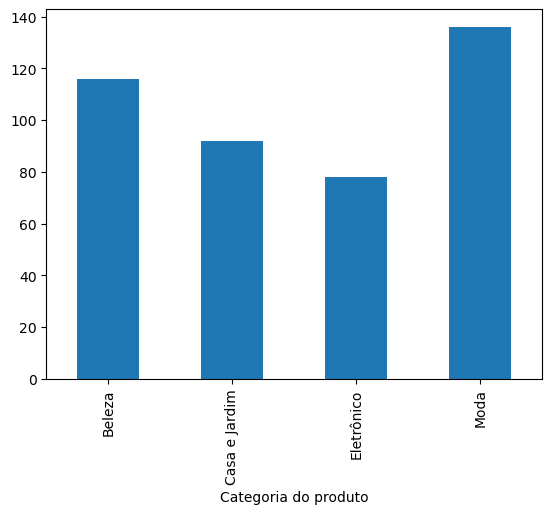

In [24]:
grupo_categoria_produto = df.groupby(['Categoria do produto']).size()
print (grupo_categoria_produto)
grupo_categoria_produto.plot.bar()

Meio de pagamento
Boleto            104
Cartão Crédito     79
Cartão Débito      78
Pix               131
dtype: int64


<Axes: xlabel='Meio de pagamento'>

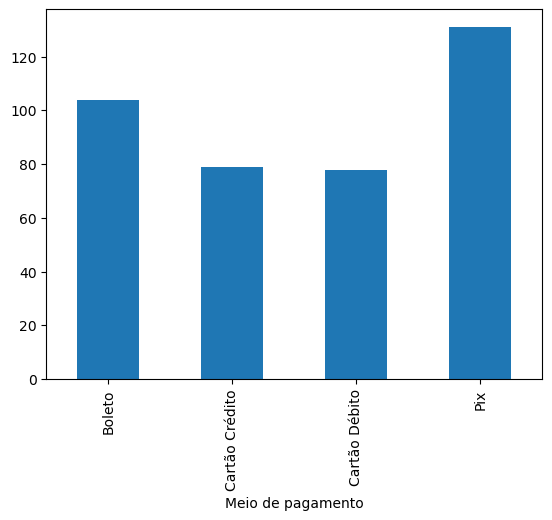

In [ ]:
grupo_meio_de_pagamento = df.groupby(['Meio de pagamento']).size()
print (grupo_meio_de_pagamento)
grupo_meio_de_pagamento.plot.bar()

# A execução foi corrida em segunda instância por meio do código presente no exercício seguinte (5)

<p>Exercício 5 - Remova os valores equivocados e unifique valores que foram digitados incorretamente</p>

In [ ]:
df['Categoria do produto'] = df['Categoria do produto'].replace({
    'Eletrôniko':'Eletrônico'
})
df = df[df['Categoria do produto'] !='Teste']


,Preço do produto,Quantidade vendida,Categoria do produto,Meio de pagamento,Idade do cliente,Valor do desconto aplicado
0,174.84,3.0,Beleza,Pix,34.0,7.76
1,143.09,32.0,Beleza,Pix,40.0,4.94
2,182.38,3.0,Eletrônico,Pix,41.0,9.91
3,226.15,27.0,Beleza,Cartão Débito,62.0,22.70
4,138.29,29.0,Beleza,Cartão Credito,36.0,15.58


In [25]:
df['Meio de pagamento'] = df['Meio de pagamento'].replace({
    'Cartão Credito':'Cartão Crédito'
})
df = df[df['Meio de pagamento'] !='Inválido']

<p>Exercício 6 - Vamos descrever (describe) os dados numéricos</p>

<p>Exercício 7 - Agora analise esses dados gerando boxplots e histogramas para os que parecem ter problemas e depois corrija os problemas identificados</p>

In [ ]:
#Gere boxplots e histogramas


In [ ]:
#Corrija os problemas identificados e comprove que foram corrigidos


<p>Exercício 8 - Verifique se há alguma correlação entre as variáveis numéricas por meio de correlação e diagrama de dispersão</p>